In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import xml.etree.ElementTree as ET
import re
import nltk
nltk.download('stopwords')

tree = ET.parse("/content/drive/MyDrive/datasets/NLP/corpus_taln_v1.tei.xml") #L'XML du corpus taln est à insérer ici.

# {http://www.tei-c.org/ns/1.0}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dans la fonction get_abstracts j'utilise la librairie xml elementtree comme conseillé dans le sujet du projet 1 pour :

1.   itérer sur les balises des articles "TEI" qui contiennent dans leur attribut de valise le mot clé "fr" qui signifie que l'article est en français,

2.   naviguer à la balise div de l'entête de l'article qui contient les résumés dont je récupère la version en français si elle existe et est différente de "None".

Je recupère aussi les années selon un procédé similaire afin de constituer la cible.

In [11]:
def Get_Abstracts(tree, size=None):
  root = tree.getroot()
  ns = re.findall("{.*}", root.tag)[0] #Le nom de domaine XML du corpus.
  abstract = []
  text = ''
  tei = root.iter(ns+"TEI") #Itérateur sur les balises 'TEI' qui correspondent aux articles.
  if size == None:
    size = root.iter(ns+"TEI")
  else:
    size = range(size)
  for i in size:
    try:
      x = tei.__next__()
      if any("fr" in s for s in x.attrib.values()):
        for y in x.iter(ns+"div"):
          if any("fr" in s for s in y.attrib.values()):
            for p in y.iter(ns+"p"):
              if p.text != "None":
                text = p.text.strip().replace('\n\t','') #Nettoyage de ce qui déborde dans les abstracts avec la fonction strip() et effacement des caractères de saut à la ligne présent dans la chaine de caractère brute. 
                break
      abstract.append(text)
    except:
      break
  return abstract

def Get_Years(tree, size=None):
  root = tree.getroot()
  ns = re.findall("{.*}", root.tag)[0] #Le nom de domaine XML du corpus.
  years = []
  text = ''
  tei = root.iter(ns+"TEI") #Itérateur sur les balises 'TEI' qui correspondent aux articles.
  if size == None:
    size = root.iter(ns+"TEI")
  else:
    size = range(size)
  for i in size:
    try:
      x = tei.__next__()
      if any("fr" in s for s in x.attrib.values()):
        for y in x.iter(ns+"publicationStmt"):
          for p in y.iter(ns+"date"):
                if p.text != "None":        
                  text = int(p.text.strip().replace('\n\t','')) #Nettoyage de ce qui déborde dans les abstracts avec la fonction strip() et effacement des caractères de saut à la ligne présent dans la chaine de caractère brute.   
                  break      
      years.append(text)
    except:
      break
  return years

In [9]:
abstracts = Get_Abstracts(tree)
abstracts[0:5]

['Nous considérons dans notre travail la tâche du traitement automatique visant à construire, à partir de textes issus d\'un corpus de constats d\'accidents de la route, des interprétations compatibles avec ces derniers, et à en proposer des illustrations sous forme de séquences d\'images fixes. Notre recherche est le fruit d\'une collaboration entre un laboratoire universitaire et une entreprise. Elle prend appui sur le modèle de la Grammaire Applicative et Cognitive [DES 90], qui vise en particulier à "expliquer", à un certain niveau cognitif, les transferts entre représentations imagées et verbales. Pour une revue de la question relative à la "transcription automatique Verbal-Image", nous renvoyons à [ARN 90] ; et plus particulièrement aux travaux de C. Vandeloise [VAN 87] et du groupe "Langue, Raisonnement, Calcul" de l\'Université Paul Sabatier [AUR 90, SAB 95] ainsi qu\'aux approches proposées dans [ARN 93] et dans le système SPRINT [YAM 92]. Plus proches encore de nos préoccupat

In [12]:
years = Get_Years(tree)
years[0:5]

[1997, 1997, 1997, 1998, 1998]

(array([ 62.,  76., 121., 173., 169., 275., 203., 198., 146., 179.]),
 array([1997. , 1999.2, 2001.4, 2003.6, 2005.8, 2008. , 2010.2, 2012.4,
        2014.6, 2016.8, 2019. ]),
 <a list of 10 Patch objects>)

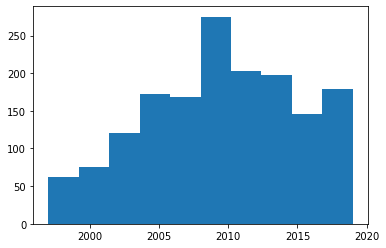

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
years = pd.DataFrame(years)
years.columns=['year']
plt.hist(years.iloc[:,0])

In [39]:
years.groupby(by='year')['year'].count()/3

year
1997     1.000000
1998     4.333333
1999    15.333333
2000     7.666667
2001    17.666667
2002    19.000000
2003    21.333333
2004    28.666667
2005    29.000000
2006    27.000000
2007    29.333333
2008    22.000000
2009    34.666667
2010    35.000000
2011    38.666667
2012    29.000000
2013    34.333333
2014    31.666667
2015    30.666667
2016    18.000000
2017    19.000000
2018    28.000000
2019    12.666667
Name: year, dtype: float64

J'utilise la librairie disponible à ce [lien](https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer) qui permet la lémmatisation des mots français en se basant sur des ressources académiques du [Lexique des Formes Fléchies du Français](http://pauillac.inria.fr/~sagot/index.html#lefff).


In [45]:
!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-2vrp3l2s
  Running command git clone -q https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-2vrp3l2s
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-cp36-none-any.whl size=3533520 sha256=df2d7f042cb3a79a3f63af1f6c9464fc44c2dfc1176d6c08def2060b4ac69775
  Stored in directory: /tmp/pip-ephem-wheel-cache-kj8ocso6/wheels/95/b7/c0/e249ca2690c04f6106b9581c5e4111287f71dbd85bac903445
Successfully built FrenchLefffLemmatizer


Les abstracts doivent être nettoyer et épurer des mots d'arrêt basique comme prétraitement avant de faire le tf-idf, je procède à ces étapes :


1.   Séparation des résumés en token avec la fonction regex de tokénisation de nltk,

2.   Utilisisation de la liste de mots d'arrêt de meilleure qualité que celle de nltk trouvé [ici](https://github.com/cmchurch/nltk_french/blob/master/french-nltk.py) dans la fonction "get_stopswords",

3.   Comme en travaux pratiques dirigés, le texte est mis en miniscule avec .lower(), a noté que la double boucle est dû à des précédentes méthodes que j'ai utilisé et qui ont donné la forme peut pratique d'une liste de liste, ainsi il est nécessaire pour accéder aux chaines de caractères de faire deux fois des for x ~ in y

4.   J'utilise ensuite la fonctionnalité de python sur la génération de liste avec opération sur chaque élement pour retirer les mots d'arrêt simples puis tous les nombres et mots courts de trois lettres ou moins,

5. Pour finir j'utilise la librairie référencer plus haut pour lemmatiser la liste de mots d'arrêt.



In [47]:
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

def clean_text(text):
  lemmatizer = FrenchLefffLemmatizer()
  tokenizer = RegexpTokenizer(r'\w+')
  fr_stop = ["Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm²", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eûmes", "eût", "eûtes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm³", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km²", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm²", "moi", "moins", "mon", "moyennant", "mt", "m²", "m³", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "nº", "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "ç'", "ça", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"]
  cleaned_text = []
  for abstract in text:
      lowercase_text = abstract.lower()
      words = tokenizer.tokenize(lowercase_text)
      non_stopped_words = [lemmatizer.lemmatize(i) for i in words if not i in fr_stop and not bool(re.search("\d+",i)) and len(i)>3]
      cleaned_text.append(non_stopped_words)
  return cleaned_text

Comme dans les exemples trouvables sur internet, j'ai utilisé l'implémentation de tfidf de sklearn ce qui me permet de récupérer le résulat final soit forme d'un Dataframe pandas avec en abscisse les mots d'arrêt et en ordonné l'index des résumés.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = clean_text(text = abstracts)
corpus = [' '.join(doc) for doc in text]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,abandonnant,abandonné,able,abord,abordant,abrupte,abrégé,absence,absent,abstractif,abstractive,abstraite,abstraites,académiques,accent,accepte,acception,acceptées,accessibles,accident,accompagne,accord,accordé,accès,accéder,acoustique,acquisition,acquisitionniste,acquière,actancielle,actant,acte,actif,action,activation,active,activité,actuelle,actuellement,acyclic,...,étiquetagemorpho,étiqueteur,étiquettage,étiquette,étiqueté,étiquetés,étranger,étude,étudiant,étudier,étudions,étudié,étudiées,étudiés,étymologie,évaluatif,évaluation,évaluative,évaluatives,évaluer,évaluerons,évaluée,éventail,éventualité,évidence,évident,éviter,évolutif,évolutifs,évolution,évolutive,évolutives,évolutivité,évoque,évoquées,évènementielle,évènements,événement,événementielle,événementiels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147619,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [49]:
df['year'] = years['year']
df

,abandonnant,abandonné,able,abord,abordant,abrupte,abrégé,absence,absent,abstractif,abstractive,abstraite,abstraites,académiques,accent,accepte,acception,acceptées,accessibles,accident,accompagne,accord,accordé,accès,accéder,acoustique,acquisition,acquisitionniste,acquière,actancielle,actant,acte,actif,action,activation,active,activité,actuelle,actuellement,acyclic,...,étiqueteur,étiquettage,étiquette,étiqueté,étiquetés,étranger,étude,étudiant,étudier,étudions,étudié,étudiées,étudiés,étymologie,évaluatif,évaluation,évaluative,évaluatives,évaluer,évaluerons,évaluée,éventail,éventualité,évidence,évident,éviter,évolutif,évolutifs,évolution,évolutive,évolutives,évolutivité,évoque,évoquées,évènementielle,évènements,événement,événementielle,événementiels,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147619,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
1599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [90]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, train_size = 0.8, stratify = df['year'])

In [93]:
train.groupby(by='year')['year'].count()/train['year'].count()*100

year
1997    0.156128
1998    0.780640
1999    2.888368
2000    1.405152
2001    3.278689
2002    3.590945
2003    3.981265
2004    5.386417
2005    5.464481
2006    5.074161
2007    5.464481
2008    4.137393
2009    6.479313
2010    6.557377
2011    7.259953
2012    5.464481
2013    6.401249
2014    5.932865
2015    5.776737
2016    3.356753
2017    3.590945
2018    5.230289
2019    2.341920
Name: year, dtype: float64

In [94]:
test.groupby(by='year')['year'].count()/test['year'].count()*100

year
1997    0.311526
1998    0.934579
1999    2.803738
2000    1.557632
2001    3.426791
2002    3.426791
2003    4.049844
2004    5.295950
2005    5.295950
2006    4.984424
2007    5.607477
2008    4.049844
2009    6.542056
2010    6.542056
2011    7.165109
2012    5.295950
2013    6.542056
2014    5.919003
2015    5.607477
2016    3.426791
2017    3.426791
2018    5.295950
2019    2.492212
Name: year, dtype: float64

In [95]:
Y_train = train['year']
del train['year']
X_train = train
Y_test = test['year']
del test['year']
X_test = test

In [96]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
Y_pred_reg = reg.predict(X_test)

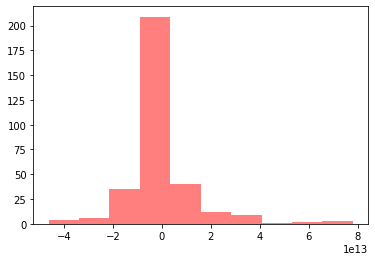

In [109]:
plt.hist(Y_pred_reg, color = 'r', alpha =0.5, label='prediction')
plt.hist(Y_test, color = 'b', alpha =0.5, label='true value')
plt.show()

In [99]:
reg2 = linear_model.BayesianRidge()
reg2.fit(X_train, Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [110]:
Y_pred_reg2 = reg2.predict(X_test)

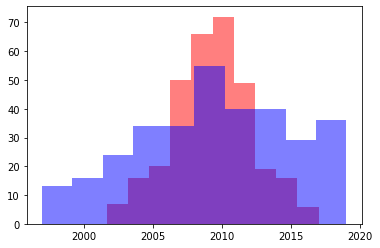

In [111]:
plt.hist(Y_pred_reg2, color = 'r', alpha =0.5, label='prediction')
plt.hist(Y_test, color = 'b', alpha =0.5, label='true value')
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(Y_pred_reg2, Y_test))
print("RMSE: %f" % (rmse))


RMSE: 4.329518


In [119]:
rmse = np.sqrt(mean_squared_error(Y_pred_reg, Y_test))
print("RMSE: %f" % (rmse))

RMSE: 14001118029266.378906


In [125]:
import xgboost as xgb
X, y = df.iloc[:,:-1],df.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, stratify = y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [126]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [127]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 701.068884
